In [102]:
printmd('Lending club Loan Data ') 
printmd(' ') 
printmd('Exploratory Data Analysis, Data Balancing, Correlation Heatmap')
printmd('Neural Network Binary Classification Model with 13 layers ( 4 Fully Connected) and 142,369 Parameters.')
printmd(' ')
printmd('Callbacks, Reduce Learning rate on Plateau, \
Classification report, Confusion Matrix, Roc curve with Auc value, \
Precision-Recall, Threshold-Recall and Threshold-Precision curves')
printmd( ' ')
printmd('Accuracy of the Neural Network Model is 98.58%')

## <span style="color:red">Lending club Loan Data </span>

## <span style="color:red"> </span>

## <span style="color:red">Exploratory Data Analysis, Data Balancing, Correlation Heatmap</span>

## <span style="color:red">Neural Network Binary Classification Model with 13 layers ( 4 Fully Connected) and 142,369 Parameters.</span>

## <span style="color:red"> </span>

## <span style="color:red">Callbacks, Reduce Learning rate on Plateau, Classification report, Confusion Matrix, Roc curve with Auc value, Precision-Recall, Threshold-Recall and Threshold-Precision curves</span>

## <span style="color:red"> </span>

## <span style="color:red">Accuracy of the Neural Network Model is 98.58%</span>

In [1]:
##############################################################################################################
# Import the required python libraries
##############################################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tqdm 
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()
import tensorflow.keras
import tensorflow as tf 
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('## <span style="color:red">'+string+'</span>'))


In [2]:
printmd('Below is the Memory saving function credit to')
printmd('https://www.kaggle.com/gemartin/load-data-reduce-memory-usage')

## <span style="color:red">Below is the Memory saving function credit to</span>

## <span style="color:red">https://www.kaggle.com/gemartin/load-data-reduce-memory-usage</span>

In [3]:
##############################################################################################################
# Memory saving function from Kaggle.com
##############################################################################################################
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
##############################################################################################################
# Load the Lending club loan data file
##############################################################################################################
loan_data = pd.read_csv("./datasets/loan_data.csv")

In [5]:
##############################################################################################################
# take a deep copy as backup to be used later
##############################################################################################################
loan_datacopy = loan_data.copy(deep=True)

In [6]:
##############################################################################################################
# apply the memory saving function on the above 2 dataframes and also look at the top and bottom 5 records
##############################################################################################################
reduce_mem_usage(loan_data)
reduce_mem_usage(loan_datacopy)

Memory usage of dataframe is 1.02 MB --> 0.39 MB (Decreased by 61.6%)
Memory usage of dataframe is 1.02 MB --> 0.39 MB (Decreased by 61.6%)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.099976,11.350407,19.480000,737,5639.958496,28854,52.099998,0,0,0,0
1,1,credit_card,0.1071,228.220001,11.082143,14.290000,707,2760.000000,33623,76.699997,0,0,0,0
2,1,debt_consolidation,0.1357,366.859985,10.373491,11.630000,682,4710.000000,3511,25.600000,1,0,0,0
3,1,debt_consolidation,0.1008,162.339996,11.350407,8.100000,712,2699.958252,33667,73.199997,1,0,0,0
4,1,credit_card,0.1426,102.919998,11.299732,14.970000,667,4066.000000,4740,39.500000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.760010,12.180755,10.390000,672,10474.000000,215372,82.099998,2,0,0,1
9574,0,all_other,0.1253,257.700012,11.141862,0.210000,722,4380.000000,184,1.100000,5,0,0,1
9575,0,debt_consolidation,0.1071,97.809998,10.596635,13.090000,687,3450.041748,10036,82.900002,8,0,0,1
9576,0,home_improvement,0.1600,351.579987,10.819778,19.180000,692,1800.000000,0,3.200000,5,0,0,1


In [7]:
##############################################################################################################
# look at all columns, data types, nulls etc using info property
##############################################################################################################
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int8   
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float32
 3   installment        9578 non-null   float32
 4   log.annual.inc     9578 non-null   float32
 5   dti                9578 non-null   float32
 6   fico               9578 non-null   int16  
 7   days.with.cr.line  9578 non-null   float32
 8   revol.bal          9578 non-null   int32  
 9   revol.util         9578 non-null   float32
 10  inq.last.6mths     9578 non-null   int8   
 11  delinq.2yrs        9578 non-null   int8   
 12  pub.rec            9578 non-null   int8   
 13  not.fully.paid     9578 non-null   int8   
dtypes: float32(6), int16(1), int32(1), int8(5), object(1)
memory usage: 402.3+ KB


In [8]:
printmd('No null values in the data, only one catagorical field and rest are numeric.')

## <span style="color:red">No null values in the data, only one catagorical field and rest are numeric.</span>

In [9]:
##############################################################################################################
# look at the statistics of all non numeric column value
##############################################################################################################
loan_data.purpose.describe()

count                   9578
unique                     7
top       debt_consolidation
freq                    3957
Name: purpose, dtype: object

In [10]:
##############################################################################################################
# look at the statistic of all numeric column values
##############################################################################################################
loan_data.describe(exclude=[object]).T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089508,207.071030,15.670000,163.770004,268.950012,432.762497,9.401400e+02
log.annual.inc,9578.0,10.932159,0.614811,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606724,6.883970,0.000000,7.212500,12.665000,17.950001,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.791504,2496.934082,178.958328,2820.000000,4139.958496,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799072,29.014410,0.000000,22.600000,46.299999,70.900002,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [11]:
##############################################################################################################
# check the values in the target column how much percentage 'paid' and how much percentage 'not paid'
##############################################################################################################
target=loan_data['not.fully.paid'].value_counts(normalize=True)
print('Percentage of Not fully Paid :', round(target[1]*100,2), "%")
print('Percentage of fully Paid     :', round(target[0]*100,2), "%")

Percentage of Not fully Paid : 16.01 %
Percentage of fully Paid     : 83.99 %


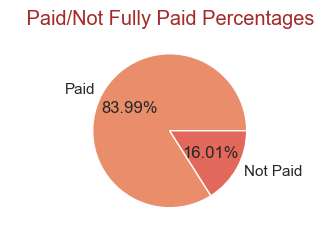

In [12]:
##############################################################################################################
# plot the target variable data to check if they are balanced or not.
##############################################################################################################
sns.set(style='whitegrid', palette='flare', font_scale=1.0)
loan_data['not.fully.paid'] = loan_data['not.fully.paid'].apply(lambda x:'Paid' if x==0 else 'Not Paid')
plt.figure(figsize=(6,2.5))
loan_data['not.fully.paid'].value_counts(sort=True).plot(kind='pie',autopct='%.2f%%') 
plt.suptitle('   Paid/Not Fully Paid Percentages',color='brown')
plt.ylabel(' ')
plt.show()

In [13]:
printmd('Target Data is not balanced. To balance, we need to upsample default/not fully paid rows')

## <span style="color:red">Target Data is not balanced. To balance, we need to upsample default/not fully paid rows</span>

In [14]:
loan_data_Def = loan_data[loan_data['not.fully.paid']!='Paid']
loan_data_Pay = loan_data[loan_data['not.fully.paid']=='Paid']
loan_data_Def.shape, loan_data_Pay.shape

((1533, 14), (8045, 14))

In [15]:
##############################################################################################################
# upsample the target data of not fully paid rows by 525% to make it equal to 8045 rows 
##############################################################################################################

loan_data_Def=loan_data_Def.sample(frac=5.247879973907371167645140247882, replace=True, random_state=1) 
loan_data_Def.shape, loan_data_Pay.shape

((8045, 14), (8045, 14))

In [16]:
##############################################################################################################
# concatenate the 'paid' and 'not paid' data into one variable
##############################################################################################################

loan_data_bal = pd.concat([loan_data_Def,loan_data_Pay],axis=0)
loan_data_bal.shape

(16090, 14)

In [17]:
##############################################################################################################
# check the values in the target column how much percentage 'paid' and how much percentage 'not paid'
##############################################################################################################
loan_data=loan_data_bal
target=loan_data['not.fully.paid'].value_counts(normalize=True)
print('Percentage of Not fully Paid :', round(target[1]*100,2), "%")
print('Percentage of fully Paid     :', round(target[0]*100,2), "%")

Percentage of Not fully Paid : 50.0 %
Percentage of fully Paid     : 50.0 %


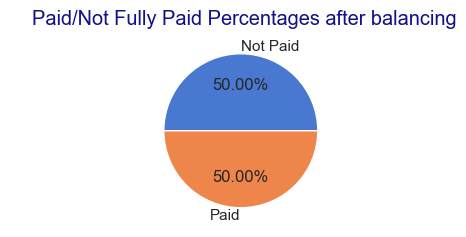

In [18]:
##############################################################################################################
# plot the target data after balancing.
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2.5))
loan_data['not.fully.paid'].value_counts(sort=True).plot(kind='pie',autopct='%.2f%%')
plt.suptitle('    Paid/Not Fully Paid Percentages after balancing',color='#111188')
plt.ylabel(' ')
plt.show()

In [19]:
##############################################################################################################
# take a backup copy of data before doing Exploratory Data Analysis to load later
##############################################################################################################

loan_datacopy = loan_data.copy(deep=True)
printmd('No null values in the data, only one catagorical field and rest numeric.')

## <span style="color:red">No null values in the data, only one catagorical field and rest numeric.</span>

In [20]:
##############################################################################################################
# Look if there are any null values, and if so print the column name, type, null count and number of unique
##############################################################################################################
cols = [col for col in loan_data.columns]
for col,type in loan_data.loc[:, cols].dtypes.iteritems():
    if loan_data[col].isnull().sum() != 0:
        if type ==  object:
            print('col :', col,'type :', type, 'null :', loan_data[col].isnull().sum() , 'nunique :', loan_data[col].nunique())
            print('unique :', loan_data[col].unique())
        else:
            print('col :', col,'type :', type, 'null :', loan_data[col].isnull().sum() , 'nunique :', loan_data[col].nunique())

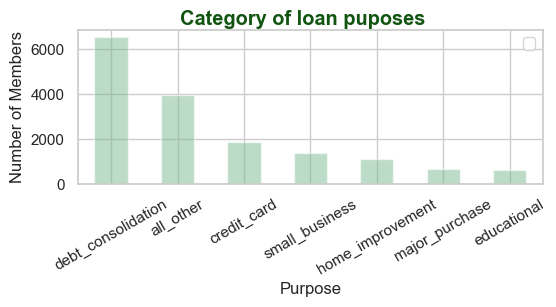

In [21]:
##############################################################################################################
# Exploratory data analysis - plot the purpose coulumn values as bar chart
##############################################################################################################
sns.set(style='whitegrid', palette='crest', font_scale=1.0)
plt.figure(figsize=(6,2))
loan_data['purpose'].value_counts(sort=True).plot(kind='bar',label='Purpose Classes',alpha=.5)
plt.suptitle('Category of loan puposes',color='#115511',fontweight='bold')
plt.xlabel('Purpose')
plt.ylabel('Number of Members')
plt.xticks(rotation=30)
plt.legend('')
plt.show()


In [22]:
printmd('Majority of the people took loan for Debt-consolidation, and least for Eductional purpose')

## <span style="color:red">Majority of the people took loan for Debt-consolidation, and least for Eductional purpose</span>

In [23]:
##############################################################################################################
# temporarily convert the values in the credit policy column for chart generation
##############################################################################################################

loan_data['credit.policy'] = \
loan_data['credit.policy'].apply(lambda x:'Meets Credit Underwriting' if x==1 else 'Does Not Meets Credit Underwriting') 

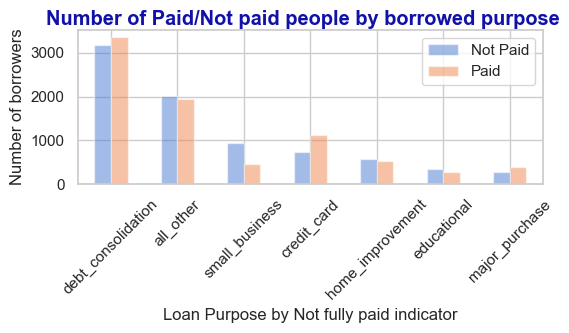

In [24]:
##############################################################################################################
# plot the purpose column values against the target column(values paid/not paid)
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
loan_data_tmp = loan_data.groupby(['purpose','not.fully.paid']).size().unstack().fillna(0)
loan_data_tmp.sort_values(by='Not Paid',ascending=False).plot.bar(figsize=(6,2),alpha=.5)
plt.xlabel('Loan Purpose by Not fully paid indicator')
plt.ylabel('Number of borrowers')
plt.xticks(rotation=45)
plt.suptitle('Number of Paid/Not paid people by borrowed purpose',color='#1111aa',fontweight='bold')
plt.legend()
plt.show()

In [25]:
printmd('Debt-consolidation has both paid and not paid in large numbers \
        compared to people who took loan for other purpose. \
        Educational purpose has the least Paid, and Major-purchase has the least Not paid')

## <span style="color:red">Debt-consolidation has both paid and not paid in large numbers         compared to people who took loan for other purpose.         Educational purpose has the least Paid, and Major-purchase has the least Not paid</span>

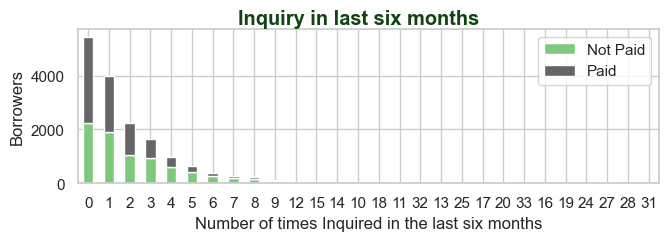

In [28]:
##############################################################################################################
# plot the Inquiry last six months column values against the target column(values paid/not paid)
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
loan_data_tmp=loan_data.groupby(['inq.last.6mths','not.fully.paid']).size().unstack().fillna(0)
loan_data_tmp.sort_values(by='Not Paid',ascending=False).plot.bar(figsize=(7.5,2),stacked=True,colormap='Accent')
plt.xlabel('Number of times Inquired in the last six months')
plt.ylabel('Borrowers')
plt.suptitle('Inquiry in last six months',color='#114411',fontweight='bold')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [29]:
printmd('People who enquired least has both majority paid/Not paid')

## <span style="color:red">People who enquired least has both majority paid/Not paid</span>

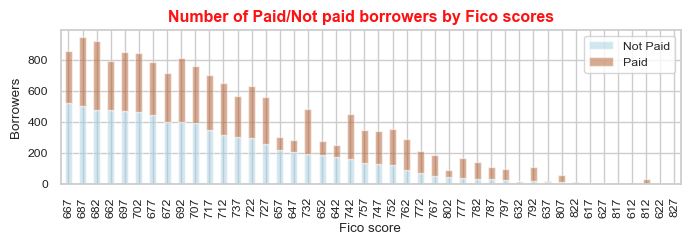

In [30]:
##############################################################################################################
# plot the Fico score column values against the target column(values paid/not paid)
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=0.8)
loan_data_tmp=loan_data.groupby(['fico','not.fully.paid']).size().unstack().fillna(0)
loan_data_tmp.sort_values(by='Not Paid',ascending=False).plot.bar(figsize=(8,2),stacked=True,colormap='Paired',alpha=.5)
plt.xlabel('Fico score ')
plt.ylabel('Borrowers')
plt.suptitle('Number of Paid/Not paid borrowers by Fico scores',color='#ff1111',fontweight='bold')
plt.legend()
plt.show()

In [31]:
printmd('People who borrowd loans has varied Fico scores, and has no relation with Paid/Not Paid')

## <span style="color:red">People who borrowd loans has varied Fico scores, and has no relation with Paid/Not Paid</span>

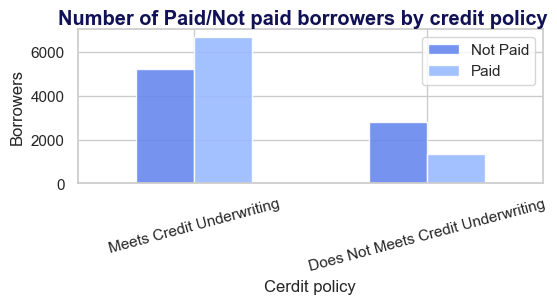

In [32]:
##############################################################################################################
# plot the credit policy column values against the target column(values paid/not paid)
##############################################################################################################
sns.set(style='whitegrid', palette='coolwarm', font_scale=1.0)
loan_data_tmp=loan_data.groupby(['credit.policy','not.fully.paid']).size().unstack().fillna(0)
loan_data_tmp.sort_values(by='Not Paid',ascending=False).plot.bar(figsize=(6,2),alpha=.9)
plt.xlabel('Cerdit policy')
plt.ylabel('Borrowers')
plt.suptitle('Number of Paid/Not paid borrowers by credit policy',color='#111155',fontweight='bold')
plt.xticks(rotation=15)
plt.legend()
plt.show()

In [33]:
printmd('Majority people who borrowed has met the Credit Underwriting ')

## <span style="color:red">Majority people who borrowed has met the Credit Underwriting </span>

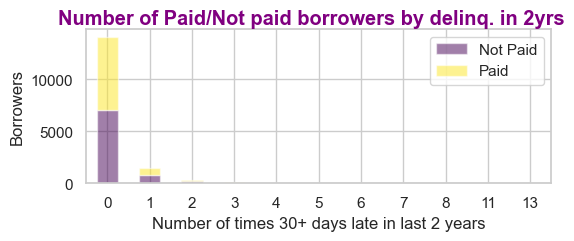

In [34]:
##############################################################################################################
# plot the Delinquent last 2 years column values against the target column(values paid/not paid)
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
loan_data_tmp=loan_data.groupby(['delinq.2yrs','not.fully.paid']).size().unstack().fillna(0)
loan_data_tmp.sort_values(by='Not Paid',ascending=False).plot.bar(figsize=(6,2),stacked=True,colormap='viridis',alpha=.5)
plt.xlabel('Number of times 30+ days late in last 2 years')
plt.ylabel('Borrowers')
plt.suptitle('Number of Paid/Not paid borrowers by delinq. in 2yrs',color='purple',fontweight='bold')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [35]:
printmd(' Majority had not paid late in last 30+ days. Few people paid late 1 or 2 times late')

## <span style="color:red"> Majority had not paid late in last 30+ days. Few people paid late 1 or 2 times late</span>

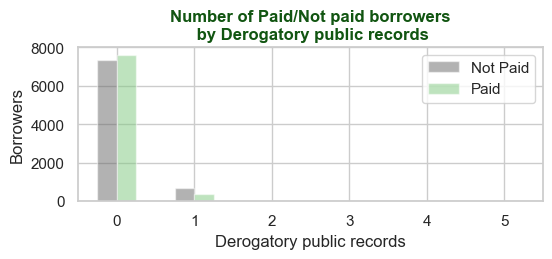

In [36]:
##############################################################################################################
# plot the public records column values against the target column(values paid/not paid)
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
loan_data_tmp=loan_data.groupby(['pub.rec','not.fully.paid']).size().unstack().fillna(0)
loan_data_tmp.sort_values(by='Not Paid',ascending=False).plot.bar(figsize=(6,2),alpha=.5,colormap='Accent_r')      
plt.xlabel('Derogatory public records')
plt.ylabel('Borrowers')
plt.title('Number of Paid/Not paid borrowers\n by Derogatory public records',color='#115511',fontweight='bold')
plt.legend()
plt.xticks(rotation=0)
plt.show() 

In [37]:
printmd('Majority has zero derogatory public records. Few has 1 derogatory public record ')

## <span style="color:red">Majority has zero derogatory public records. Few has 1 derogatory public record </span>

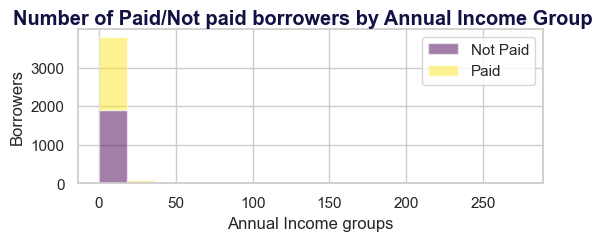

In [38]:
##############################################################################################################
# plot the Annual income column values against the target column(values paid/not paid)
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
loan_data_tmp=loan_data.groupby(['log.annual.inc','not.fully.paid']).size().unstack().fillna(0)
loan_data_tmp.sort_values(by='Not Paid',ascending=False).plot.hist(bins=15,figsize=(6,2),alpha=.5,\
                                                                   stacked=True,colormap='viridis')
plt.xlabel('Annual Income groups')
plt.ylabel('Borrowers')
plt.suptitle('Number of Paid/Not paid borrowers by Annual Income Group',color='#111144',fontweight='bold')
plt.legend()
plt.show() 

In [39]:
printmd('Majoity of the people who borrowd loans belong to one small income group')

## <span style="color:red">Majoity of the people who borrowd loans belong to one small income group</span>

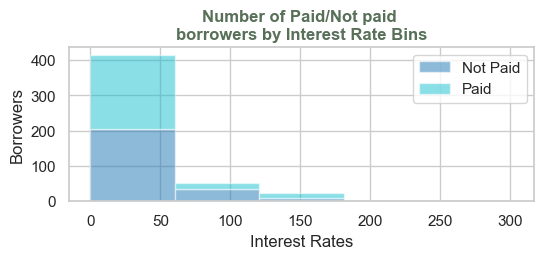

In [40]:
##############################################################################################################
# plot the Interest rate column values against the target column(values paid/not paid)
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
loan_data_tmp=loan_data.groupby(['int.rate','not.fully.paid']).size().unstack().fillna(0)
loan_data_tmp.sort_values(by='Not Paid',ascending=False).plot.hist(bins=5,figsize=(6,2),stacked=True,alpha=.5,colormap='tab10') 
plt.xlabel('Interest Rates')
plt.ylabel('Borrowers')
plt.title('Number of Paid/Not paid \nborrowers by Interest Rate Bins',alpha=.7,color='#113311',fontweight='bold')
plt.legend()
plt.show() 

In [41]:
##############################################################################################################
# load the backup copy of loan data into loan data variable and factorize the purpose column for Model
##############################################################################################################
loan_data = loan_datacopy
loan_data['not.fully.paid'] = loan_data['not.fully.paid'].apply(lambda x:0 if x=='Paid' else 1)
loan_data['purpose'] = loan_data['purpose'].factorize()[0]
loan_data.purpose.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [42]:
##############################################################################################################
# delete the tempory variables and run the garbage collection to free the memory
##############################################################################################################
import gc
del loan_datacopy,loan_data_tmp
gc.collect()

66853

In [43]:
##############################################################################################################
# check the correlation between differnet values in the loan data file
##############################################################################################################
cor = loan_data.corr()

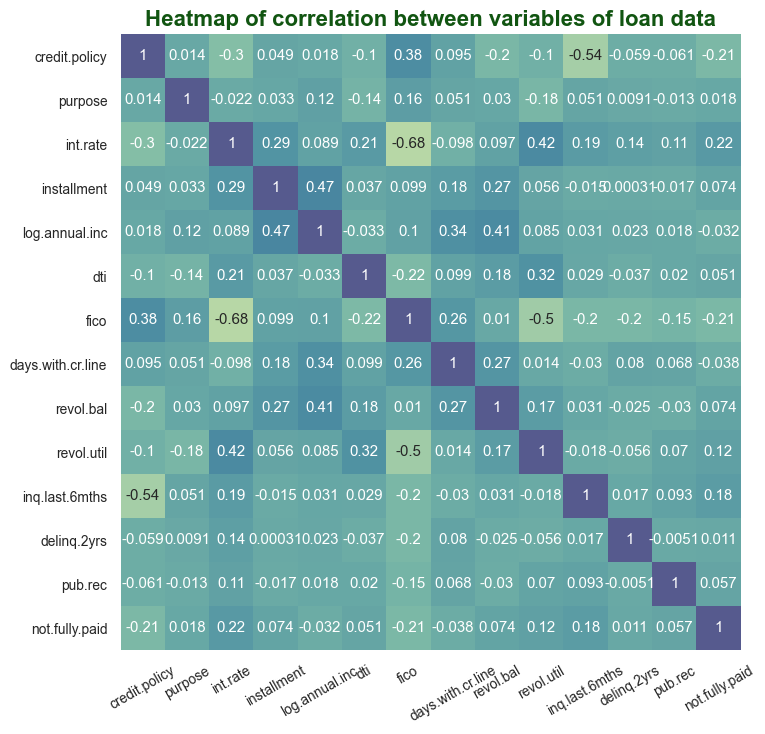

In [44]:
##############################################################################################################
# plot the heatmap of the correlation between different varaiables in the file
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=.9)
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=True,cbar=False,cmap=sns.cm.crest,alpha=.8)
plt.xticks(rotation=30)
plt.title('Heatmap of correlation between variables of loan data',\
             color='#115511',fontweight='bold',fontsize=16)
plt.show()

In [45]:
printmd('Paid/Not Paid indicator has no strong correlation with any of the fields.')
printmd('However, as expected Interest rates has strong negative correlation with Fico scores.')
printmd('Inquiry in last 6 months has strong negative correlation with credit policy.')
printmd('Similarly Fico scores and revolve util has strong negative correlation. ')

## <span style="color:red">Paid/Not Paid indicator has no strong correlation with any of the fields.</span>

## <span style="color:red">However, as expected Interest rates has strong negative correlation with Fico scores.</span>

## <span style="color:red">Inquiry in last 6 months has strong negative correlation with credit policy.</span>

## <span style="color:red">Similarly Fico scores and revolve util has strong negative correlation. </span>

In [46]:
##############################################################################################################
# reindex the loan data file to shuffle randomly
##############################################################################################################
loan_data = loan_data.reindex(loan_data.index,axis='index',method='ffill')

loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7874,0,0,0.1786,432.989990,10.604603,12.83,652,2878.958252,4157,96.699997,12,0,1,1
1436,1,0,0.1146,329.570007,11.451008,7.85,727,6600.000000,17465,95.400002,1,0,0,1
7972,0,1,0.1533,487.589996,11.238488,9.49,652,2789.000000,16075,80.400002,1,1,0,1
6841,1,1,0.1670,71.010002,12.858397,1.77,692,1530.000000,13757,98.300003,0,0,0,1
5203,1,1,0.0894,317.720001,11.371443,13.34,737,7169.958496,39299,54.299999,0,0,0,1


In [47]:
##############################################################################################################
# check the shape of the loan data file
##############################################################################################################
loan_data.shape

(16090, 14)

In [48]:
##############################################################################################################
# load the target varaiable values in one varaible and the rest in another variable for model building
##############################################################################################################
X= loan_data.iloc[:,:-1]
y= loan_data.iloc[:,13]

In [49]:
##############################################################################################################
# look at the top 5 rows of the new field without target varable
##############################################################################################################
X.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
7874,0,0,0.1786,432.989990,10.604603,12.83,652,2878.958252,4157,96.699997,12,0,1
1436,1,0,0.1146,329.570007,11.451008,7.85,727,6600.000000,17465,95.400002,1,0,0
7972,0,1,0.1533,487.589996,11.238488,9.49,652,2789.000000,16075,80.400002,1,1,0
6841,1,1,0.1670,71.010002,12.858397,1.77,692,1530.000000,13757,98.300003,0,0,0
5203,1,1,0.0894,317.720001,11.371443,13.34,737,7169.958496,39299,54.299999,0,0,0


In [50]:
##############################################################################################################
# look at the value counts in the target variable
##############################################################################################################
y.value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

In [51]:
##############################################################################################################
# import the train_test_split module from sklearn to split into training and testing fields for model
##############################################################################################################
from sklearn.model_selection import train_test_split

In [52]:
##############################################################################################################
# split into train and test values of input varaibels
##############################################################################################################
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y)

In [53]:
##############################################################################################################
# check the shape of the newly created train and test variables 
##############################################################################################################
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((12067, 13), (4023, 13), (12067,), (4023,))

In [54]:
##############################################################################################################
# see if the labels are spread evenly between train and test files
##############################################################################################################
ytest.value_counts(), ytrain.value_counts()

(1    2012
 0    2011
 Name: not.fully.paid, dtype: int64,
 0    6034
 1    6033
 Name: not.fully.paid, dtype: int64)

In [55]:
##############################################################################################################
# normalize the traina and test datasests
##############################################################################################################
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest  = scaler.transform(xtest)

In [56]:
##############################################################################################################
# delete the temporary varaibles to free up the space
##############################################################################################################
del X,y
gc.collect()

15545

In [73]:
##############################################################################################################
# import the libraries for deep learning model building
##############################################################################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers 

In [74]:
##############################################################################################################
# build the deep learnig model and compile for loan data analysis 
##############################################################################################################
def Create_Model():
    model = Sequential()
    model.add(Input(shape=(13,)))
    model.add(Dense(256, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l2(0.000001)))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(Dense(256, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1(0.000001)))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(Dense(256, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l2(0.000001)))
    model.add(Dropout(.2))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(16, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1(0.000001)))
    model.add(Dropout(.2))

    model.add(Dense(1, activation=tf.nn.sigmoid))
    return model

In [75]:
##############################################################################################################
# Instantiate the deep learnig model and compile for loan data analysis 
##############################################################################################################
model = Create_Model()

In [76]:
##############################################################################################################
# import callback and load model modules 
##############################################################################################################
tqdm_callback = tfa.callbacks.TQDMProgressBar()
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model 
FILEPATHA="./Weights/weights_Lending_club_loan_Data_Analysis_Model.hdf5"

In [77]:
##############################################################################################################
# define check points  
##############################################################################################################
checkpoint = ModelCheckpoint(FILEPATHA, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

RLROP_PAT = 19
DECAY_DROP = 0.95

Reduce_lr_on_plat=ReduceLROnPlateau(monitor='val_accuracy',mode='max',patience=RLROP_PAT,factor=DECAY_DROP,\
                                    min_lr=1e-22,verbose=2 )


callbacks = [tqdm_callback, checkpoint, Reduce_lr_on_plat] 
 

In [83]:
##############################################################################################################
# load the model for prediction and also print the model summary of the loaded model 
##############################################################################################################
model = load_model(FILEPATHA)
#model.load_weights('./Weights/weights_Lending_club_loan_Data_Analysis_Model_98.71%.hdf5')
lr=2e-11
optimizer  = tensorflow.keras.optimizers.Adam(lr=lr, beta_1=0.9)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy',metrics = ['accuracy']) 

model.summary()                                                                                                     

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6

In [79]:
##############################################################################################################
# fit the built model and run it for 1000 epochs
##############################################################################################################
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest),     
                    batch_size=50, epochs=11, verbose=0,callbacks=callbacks)

Training:   0%|                                                                                0/11 ETA: ?s,  …

Epoch 1/11


0/242                                                                                                        E…


Epoch 00001: val_accuracy improved from -inf to 0.98583, saving model to ./Weights\weights_Lending_club_loan_Data_Analysis_Model.hdf5
Epoch 2/11


0/242                                                                                                        E…


Epoch 00002: val_accuracy did not improve from 0.98583
Epoch 3/11


0/242                                                                                                        E…


Epoch 00003: val_accuracy did not improve from 0.98583
Epoch 4/11


0/242                                                                                                        E…


Epoch 00004: val_accuracy did not improve from 0.98583
Epoch 5/11


0/242                                                                                                        E…


Epoch 00005: val_accuracy did not improve from 0.98583
Epoch 6/11


0/242                                                                                                        E…


Epoch 00006: val_accuracy did not improve from 0.98583
Epoch 7/11


0/242                                                                                                        E…


Epoch 00007: val_accuracy did not improve from 0.98583
Epoch 8/11


0/242                                                                                                        E…


Epoch 00008: val_accuracy did not improve from 0.98583
Epoch 9/11


0/242                                                                                                        E…


Epoch 00009: val_accuracy did not improve from 0.98583
Epoch 10/11


0/242                                                                                                        E…


Epoch 00010: val_accuracy did not improve from 0.98583
Epoch 11/11


0/242                                                                                                        E…


Epoch 00011: val_accuracy did not improve from 0.98583


In [84]:
##############################################################################################################
# extract the variables for accuracy and loss reporting
##############################################################################################################
train_loss, train_acc = model.evaluate(xtrain, ytrain, verbose=2,callbacks=[tqdm_callback])
test_loss, test_acc = model.evaluate(xtest, ytest, verbose=2,callbacks=[tqdm_callback])
print('Train Accu: %.3f, Test Accu: %.3f' % (train_acc, test_acc))
print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))

0/378                                                                                              ETA: ?s - E…

378/378 - 1s - loss: 0.0569 - accuracy: 0.9848


0/126                                                                                              ETA: ?s - E…

126/126 - 0s - loss: 0.0593 - accuracy: 0.9858
Train Accu: 0.985, Test Accu: 0.986
Train Loss: 0.057, Test Loss: 0.059


In [85]:
printmd('Accuracy of 98.6% on validation data. ')

## <span style="color:red">Accuracy of 98.6% on validation data. </span>

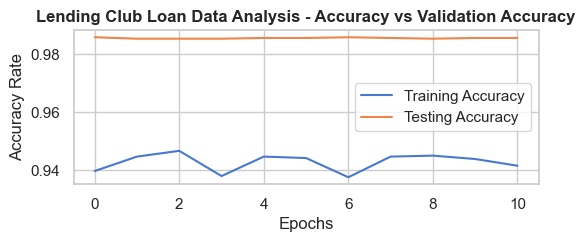

In [86]:
##############################################################################################################
# create training and testing accuracy chart
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Lending Club Loan Data Analysis - Accuracy vs Validation Accuracy',fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Rate')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
printmd('Accuracy and loss for training and testing are similar. No overfitting problem ')

## <span style="color:red">Accuracy and loss for training and testing are similar. No overfitting problem </span>

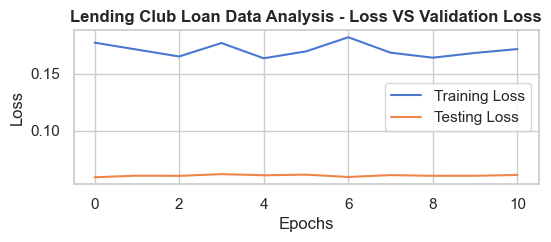

In [88]:
##############################################################################################################
# create the trainig and testing loss chart
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Lending Club Loan Data Analysis - Loss VS Validation Loss',fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [89]:
##############################################################################################################
# predict and extract the count of rows with probability more than .5 as the loan default indicator
##############################################################################################################
pred=model.predict(xtest)
c=pred[pred>.5]
len(c)

2059

In [90]:
##############################################################################################################
# extract the classes predicted by the model
##############################################################################################################
pred1=model.predict_classes(xtest)
a=pred1[pred1==1]
len(a)

2059

In [91]:
##############################################################################################################
# extract the ground truth values of loan default indicators
##############################################################################################################
b=ytest[ytest==1]
len(b)

2012

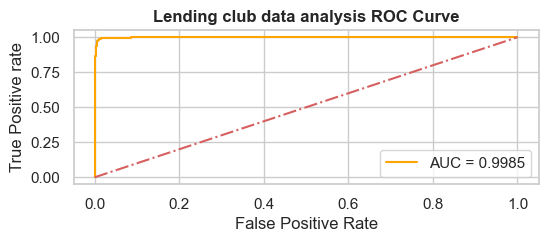

In [92]:
##############################################################################################################
# import rquired library and create the roc curve 
##############################################################################################################
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
pred_prob = model.predict_proba(xtest)
fpr, tpr, thresh = roc_curve(ytest, pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,2))
plt.plot(fpr, tpr,color='orange', label='AUC = %0.4f'% roc_auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Lending club data analysis ROC Curve',fontweight='bold')
plt.legend(loc='best')
plt.show()

In [93]:
printmd('An impressive Roc curve and AUC value')

## <span style="color:red">An impressive Roc curve and AUC value</span>

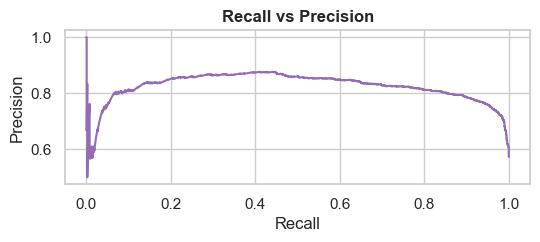

In [94]:
##############################################################################################################
# creata the precision recall curve 
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
mse = np.mean(np.power(xtest - pred, 2), axis=1)
precision, recall, th = precision_recall_curve(ytest, mse)
plt.figure(figsize=(6,2))
plt.plot(recall, precision, 'm', label='Precision-Recall curve')
plt.title('Recall vs Precision',fontweight='bold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

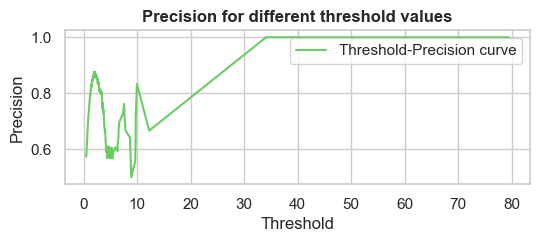

In [95]:
##############################################################################################################
# creata the Threshold Precision curve 
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(th, precision[1:], 'g', label='Threshold-Precision curve')
plt.title('Precision for different threshold values',fontweight='bold')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.legend()
plt.show()

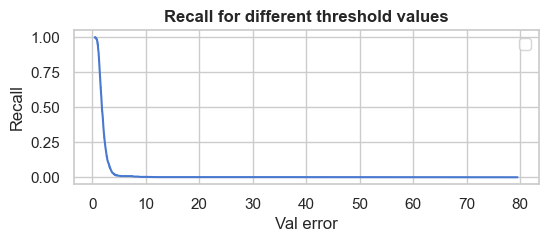

In [96]:
##############################################################################################################
# creata the Threshold Recall curve 
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values',fontweight='bold')
plt.xlabel('Val error')
plt.ylabel('Recall')
plt.legend('')
plt.show()

Confusion matrix of Lending Club Loan Data
[[1959   52]
 [   5 2007]]


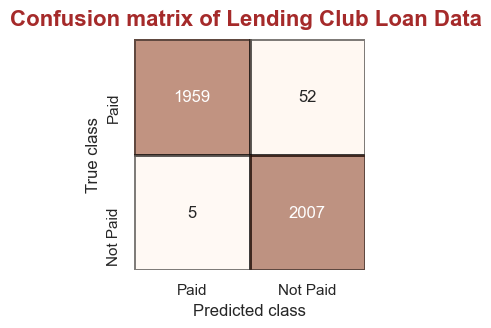

In [97]:
##############################################################################################################
# create the confusion martrix of predicted and actual values for comparision.
##############################################################################################################
from sklearn.metrics import confusion_matrix, classification_report
LABELS=['Paid','Not Paid']
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
conf_matrix = confusion_matrix(ytest, pred1)
print('Confusion matrix of Lending Club Loan Data' )
print(conf_matrix)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS,linewidths=2,linecolor='black',square=True,cbar=False,alpha=.5,
            annot=True,robust=True, fmt="d",cmap=plt.cm.Oranges);

plt.suptitle("Confusion matrix of Lending Club Loan Data",color='brown',fontweight='bold',fontsize='16')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [98]:
##############################################################################################################
# create the classification report of the model output
##############################################################################################################
printmd('Confusion matrix is looking great')
printmd('True Positive and True Negative counts are way higher than ')
printmd('False Positive and False Negative counts')

## <span style="color:red">Confusion matrix is looking great</span>

## <span style="color:red">True Positive and True Negative counts are way higher than </span>

## <span style="color:red">False Positive and False Negative counts</span>

In [99]:
##############################################################################################################
# create the classification report of the model output
##############################################################################################################
print(classification_report(ytest, pred1,target_names=['Paid','Not Paid']))

              precision    recall  f1-score   support

        Paid       1.00      0.97      0.99      2011
    Not Paid       0.97      1.00      0.99      2012

    accuracy                           0.99      4023
   macro avg       0.99      0.99      0.99      4023
weighted avg       0.99      0.99      0.99      4023



In [101]:
##############################################################################################################
# create the classification report of the model output
##############################################################################################################
printmd('Precision for Paid is higher than that of Not-Paid accounts; and Recall/Sensitivity is more for Not-Paid \
        accounts compared to Paid accounts. F1-score is same for both type of accounts.')
printmd("Sensitivity for Not-Paid accounts is 1.0. So, I say we can use the model without any problem to\
         predict chances of default for future  loans by less than .1% of error ")
printmd("Overall accuracy of the model is 99%, which is great for an  \
         imbalanced dataset.")

## <span style="color:red">Precision for Paid is higher than that of Not-Paid accounts; and Recall/Sensitivity is more for Not-Paid         accounts compared to Paid accounts. F1-score is same for both type of accounts.</span>

## <span style="color:red">Sensitivity for Not-Paid accounts is 1.0. So, I say we can use the model without any problem to         predict chances of default for future  loans by less than .1% of error </span>

## <span style="color:red">Overall accuracy of the model is 99%, which is great for an           imbalanced dataset.</span>